In [1]:
!pip install PyPDF2 pdfplumber transformers torch scikit-learn sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.8/255.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 66.7 MB/s eta 0:00:00


In [2]:
!pip install Chromadb sentence-transformers langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.6 MB/s eta 0:00:00
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Preparing metadata (pyproject.toml) ... - done
INFO: pip is looking at multiple versions of opentelemetry-sdk to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.5/612.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 408.7/408.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.0/299.0 

In [3]:
import os
import chromadb
import requests
from langchain.embeddings import SentenceTransformerEmbeddings
from langchain.vectorstores import Chroma
from langchain.prompts import ChatPromptTemplate
from langchain.embeddings import HuggingFaceEmbeddings

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Import the required library
import pdfplumber

# Function to extract text from the specified page range in the PDF
def extract_text_from_pdf(file_path, start_page, end_page):
    text = []
    with pdfplumber.open(file_path) as pdf:
        for i in range(start_page, end_page):
            page = pdf.pages[i]
            text.append(page.extract_text())
    return ' '.join(text)

# Example usage
file_path = "/kaggle/input/dsm5-mental/DSM5.pdf"  # Path to your PDF file on Google Drive
start_page = 76  # Start from the page where main content begins
end_page = 837   # End at the page where main content ends

# Extract text
extracted_text = extract_text_from_pdf(file_path, start_page, end_page)

# Display a sample of the extracted text
print(extracted_text[:1000])  # Print first 1000 characters of extracted text to check output


32 Neurodevelopmental Disorders
be met based on historical information, although the current presentation must cause sig-
nificant impairment.
Within the diagnosis of autism spectrum disorder, individual clinical characteristics
are noted through the use of specifiers (with or without accompanying intellectual impair-
ment; with or without accompanying structural language impairment; associated with a
known medical/genetic or environmental/acquired condition; associated with another
neurodevelopmental, mental, or behavioral disorder), as well as specifiers that describe
the autistic symptoms (age at first concern; with or without loss of established skills; sever-
ity). These specifiers provide clinicians with an opportunity to individualize the diagnosis
and communicate a richer clinical description of the affected individuals. For example, many
individuals previously diagnosed with Asperger’s disorder would now receive a diagnosis
of autism spectrum disorder without language or intel

In [6]:
import re

# Function to preprocess text by cleaning and splitting into sentences
def preprocess_text(text):
    # Remove extra spaces and non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    # Split into sentences using punctuation marks like '.', '!', or '?'
    sentences = re.split(r'(?<=[.!?]) +', text)
    return sentences

# Example usage
sentences = preprocess_text(extracted_text)

# Display a few cleaned sentences for verification
for i, sentence in enumerate(sentences[:5]):  # Print the first 5 sentences
    print(f"Sentence {i + 1}: {sentence}")


Sentence 1: 32 Neurodevelopmental Disorders be met based on historical information, although the current presentation must cause sig- nificant impairment.
Sentence 2: Within the diagnosis of autism spectrum disorder, individual clinical characteristics are noted through the use of specifiers (with or without accompanying intellectual impair- ment; with or without accompanying structural language impairment; associated with a known medical/genetic or environmental/acquired condition; associated with another neurodevelopmental, mental, or behavioral disorder), as well as specifiers that describe the autistic symptoms (age at first concern; with or without loss of established skills; sever- ity).
Sentence 3: These specifiers provide clinicians with an opportunity to individualize the diagnosis and communicate a richer clinical description of the affected individuals.
Sentence 4: For example, many individuals previously diagnosed with Asperger’s disorder would now receive a diagnosis of au

In [7]:
for i in range(1000):
  print(extracted_text[i], end="")

32 Neurodevelopmental Disorders
be met based on historical information, although the current presentation must cause sig-
nificant impairment.
Within the diagnosis of autism spectrum disorder, individual clinical characteristics
are noted through the use of specifiers (with or without accompanying intellectual impair-
ment; with or without accompanying structural language impairment; associated with a
known medical/genetic or environmental/acquired condition; associated with another
neurodevelopmental, mental, or behavioral disorder), as well as specifiers that describe
the autistic symptoms (age at first concern; with or without loss of established skills; sever-
ity). These specifiers provide clinicians with an opportunity to individualize the diagnosis
and communicate a richer clinical description of the affected individuals. For example, many
individuals previously diagnosed with Asperger’s disorder would now receive a diagnosis
of autism spectrum disorder without language or intel

In [8]:
len(sentences)

18180

In [9]:
from sentence_transformers import SentenceTransformer

# Load pre-trained SBERT model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

/opt/conda/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
# Function to get embeddings for a list of sentences using SBERT
def get_sentence_embeddings_sbert(sentences):
    embeddings = model.encode(sentences, convert_to_tensor=True)  # Return tensors
    return embeddings

# Example usage
sentence_embeddings = get_sentence_embeddings_sbert(sentences)

Batches:   0%|          | 0/569 [00:00<?, ?it/s]

In [11]:
len(sentence_embeddings[0])

384

In [12]:
# Display a few sentence embeddings for verification
for i, embedding in enumerate(sentence_embeddings[:3]):  # Print embeddings for the first 3 sentences
    print(f"Embedding for Sentence {i + 1}: {embedding}\n")

Embedding for Sentence 1: tensor([-0.0629,  0.0787,  0.2971, -0.0280, -0.1071,  0.1510, -0.1776,  0.2334,
        -0.0539, -0.0653,  0.0547,  0.1988, -0.1516,  0.2017, -0.5276,  0.0841,
        -0.1476, -0.1290,  0.0783, -0.2219, -0.2030,  0.1287,  0.2404, -0.2160,
         0.2902, -0.1729,  0.0897, -0.1809,  0.1347, -0.1206,  0.2799,  0.2575,
         0.2699, -0.0124, -0.0439, -0.2445, -0.1385,  0.3777, -0.2027, -0.0903,
         0.0915,  0.1938,  0.0841,  0.1527,  0.3712,  0.2398, -0.0236, -0.3264,
        -0.4565,  0.0559,  0.0694, -0.2631,  0.1792,  0.4457,  0.3889,  0.0414,
        -0.0128, -0.2240, -0.0158,  0.4868,  0.0444, -0.0830, -0.3965, -0.5964,
         0.7980,  0.1237,  0.4379, -0.3479, -0.1772,  0.3231,  0.2642,  0.0118,
        -0.0523,  0.1827,  0.0932, -0.0583, -0.2023,  0.0915,  0.2129, -0.4318,
        -0.0451,  0.4930,  0.2772, -0.3585,  0.3656, -0.2088, -0.4239,  0.0201,
        -0.4315,  0.1503, -0.2307, -0.1305, -0.1916, -0.2052,  0.2402, -0.1644,
        -0.159

In [13]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import torch

# Function to group similar sentences based on cosine similarity
def group_similar_sentences(embeddings, threshold=0.6):
    # Ensure embeddings are on the CPU and convert to NumPy array
    if isinstance(embeddings, list):  # If it's a list of tensors
        embeddings = [embedding.cpu().numpy() if hasattr(embedding, 'cpu') else embedding for embedding in embeddings]
    else:  # If it's a tensor
        embeddings = embeddings.cpu().numpy()
    
    # Compute cosine similarity between all sentence embeddings
    similarity_matrix = cosine_similarity(np.vstack(embeddings))
    chunks = []
    current_chunk = []
    
    for i, similarity in enumerate(similarity_matrix):
        if not current_chunk:
            current_chunk.append(i)
        elif max(similarity[current_chunk]) >= threshold:
            current_chunk.append(i)
        else:
            chunks.append(current_chunk)
            current_chunk = [i]
    
    if current_chunk:
        chunks.append(current_chunk)
    
    return chunks

In [14]:
# Function to compute the representative vector for each chunk
def compute_chunk_vectors(sentence_embeddings, chunks):
    chunk_vectors = []
    
    for chunk in chunks:
        # Convert each embedding to CPU and NumPy array if necessary
        chunk_embeddings = [sentence_embeddings[i].cpu().numpy() if hasattr(sentence_embeddings[i], 'cpu') else sentence_embeddings[i] for i in chunk]
        # Compute the mean vector for the chunk
        chunk_embedding = np.mean(chunk_embeddings, axis=0)
        chunk_vectors.append(chunk_embedding)
    
    return chunk_vectors


In [15]:
#Example usage: Group sentences and display top similar chunks
chunks = group_similar_sentences(sentence_embeddings)

In [16]:
chunk_vectors = compute_chunk_vectors(sentence_embeddings, chunks)  # Compute representative vectors

In [17]:
len(chunk_vectors[0])

384

In [18]:
# Function to display chunks and their representative vectors
def print_chunks_and_vectors(sentences, sentence_embeddings, chunks, chunk_vectors, num_chunks_to_display=3):
    for chunk_idx, chunk in enumerate(chunks[:num_chunks_to_display]):
        print(f"Chunk {chunk_idx + 1}:")
        for sent_idx in chunk:
            print(f" - Sentence: {sentences[sent_idx]}")
            print(f"   Vector: {sentence_embeddings[sent_idx]}")
        print(f"\nRepresentative vector for chunk {chunk_idx + 1}: {chunk_vectors[chunk_idx]}\n")

In [19]:
# Display some of the chunks and their corresponding vectors
print_chunks_and_vectors(sentences, sentence_embeddings, chunks, chunk_vectors, num_chunks_to_display=3)

Chunk 1:
 - Sentence: 32 Neurodevelopmental Disorders be met based on historical information, although the current presentation must cause sig- nificant impairment.
   Vector: tensor([-0.0629,  0.0787,  0.2971, -0.0280, -0.1071,  0.1510, -0.1776,  0.2334,
        -0.0539, -0.0653,  0.0547,  0.1988, -0.1516,  0.2017, -0.5276,  0.0841,
        -0.1476, -0.1290,  0.0783, -0.2219, -0.2030,  0.1287,  0.2404, -0.2160,
         0.2902, -0.1729,  0.0897, -0.1809,  0.1347, -0.1206,  0.2799,  0.2575,
         0.2699, -0.0124, -0.0439, -0.2445, -0.1385,  0.3777, -0.2027, -0.0903,
         0.0915,  0.1938,  0.0841,  0.1527,  0.3712,  0.2398, -0.0236, -0.3264,
        -0.4565,  0.0559,  0.0694, -0.2631,  0.1792,  0.4457,  0.3889,  0.0414,
        -0.0128, -0.2240, -0.0158,  0.4868,  0.0444, -0.0830, -0.3965, -0.5964,
         0.7980,  0.1237,  0.4379, -0.3479, -0.1772,  0.3231,  0.2642,  0.0118,
        -0.0523,  0.1827,  0.0932, -0.0583, -0.2023,  0.0915,  0.2129, -0.4318,
        -0.0451,  0.4930

In [20]:
len(chunks)

12902

In [21]:
import json

# Function to save chunks, text, and vectors to a JSON file
def save_chunks_to_json(chunks, sentences, chunk_vectors, output_file):
    chunk_data = {}
    
    for idx, chunk in enumerate(chunks):
        # Get the sentences for the current chunk
        chunk_text = [sentences[i] for i in chunk]
        # Get the vector for the current chunk and flatten it to 1D if needed
        chunk_vector = chunk_vectors[idx].flatten().tolist()
        
        # Store the chunk text and vector in the dictionary
        chunk_data[f"Chunk_{idx}"] = {
            "text": chunk_text,
            "vector": chunk_vector  # Flattened vector (1D with 768 elements)
        }
    
    # Write the chunk data to a JSON file
    with open(output_file, 'w') as f:
        json.dump(chunk_data, f, indent=4)

In [22]:
# Example usage
output_file = "chunk_vectors.json"
save_chunks_to_json(chunks, sentences, chunk_vectors, output_file)

In [23]:
import json

# Function to display the last chunk and its vector from a JSON file
def display_final_chunk_from_json(json_file):
    # Open the JSON file and load its content
    with open(json_file, 'r') as f:
        chunk_data = json.load(f)
    
    # Get the last chunk by its key
    last_chunk_key = list(chunk_data.keys())[-1]
    last_chunk = chunk_data[last_chunk_key]
    
    # Display the final chunk's text and vector
    print(f"Chunk: {last_chunk_key}")
    print("Text:")
    for sentence in last_chunk["text"]:
        print(f" - {sentence}")
    
    print("\nVector (first 10 elements for brevity):")
    print(last_chunk["vector"][:10])  # Display only the first 10 elements of the vector

# Example usage
json_file = "/kaggle/working/chunk_vectors.json"
display_final_chunk_from_json(json_file)


Chunk: Chunk_12901
Text:
 - Continued caffeine use despite knowledge of having a persistent or recurrent physical or psychological problem that is likely to have been caused or exacerbated by caffeine.

Vector (first 10 elements for brevity):
[-0.13515529036521912, -0.2731426954269409, -0.02623775228857994, 0.6497095227241516, 0.38185980916023254, 0.3192697763442993, 0.15380729734897614, 0.27679938077926636, -0.2489202916622162, -0.34351181983947754]


In [24]:
# Function to load chunks and vectors from a JSON file
import json

def load_chunks_and_vectors_from_json(file_path):
    with open(file_path, 'r') as json_file:
        data = json.load(json_file)
        
    # Extract chunks and vectors from the values of the dictionary
    chunks = [entry["text"] for entry in data.values()]
    vectors = [entry["vector"] for entry in data.values()]

    return chunks, vectors

# Example usage
file_path = '/kaggle/working/chunk_vectors.json'
chunks, vectors = load_chunks_and_vectors_from_json(file_path)

# Output the first chunk and vector to verify
print(f"First chunk: {chunks[0]}")
print(f"First vector (first 10 elements): {vectors[0][:10]}")


First chunk: ['32 Neurodevelopmental Disorders be met based on historical information, although the current presentation must cause sig- nificant impairment.']
First vector (first 10 elements): [-0.06292200088500977, 0.07871802151203156, 0.29711422324180603, -0.02799220196902752, -0.10713893175125122, 0.1510366052389145, -0.1776203066110611, 0.23342597484588623, -0.0539257749915123, -0.06533808261156082]


In [25]:
file_path = '/kaggle/working/chunk_vectors.json'
chunks, vectors = load_chunks_and_vectors_from_json(file_path)

In [26]:
len(chunks)

12902

In [27]:
len(vectors)

12902

In [28]:
chunks[9]

['Developmental coordination dis- order is characterized by deficits in the acquisition and execution of coordinated motor skills and is manifested by clumsiness and slowness or inaccuracy of performance of mo- tor skills that cause interference with activities of daily living.']

In [29]:
len(vectors[9])

384

In [30]:
from chromadb import Client

# Connect to ChromaDB with default settings
client = Client()  # Initializes with default settings

# Define collection name
collection_name = "mental_health"  # The collection name in ChromaDB

# Create or get the collection
collection = client.get_or_create_collection(collection_name)

# Function to save chunks and vectors to ChromaDB
def save_chunks_and_vectors_to_chromadb(chunks, chunk_vectors):
    for idx, (chunk, vector) in enumerate(zip(chunks, chunk_vectors)):
        collection.add(
            documents=[chunk],  # The text you want to store
            embeddings=[vector],  # Directly use the vector (assumed to be a list)
            ids=[str(idx)]  # Unique ID for each chunk (convert to string)
        )

save_chunks_and_vectors_to_chromadb(chunks, vectors)

In [31]:
from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("GROQ_API_KEY")

In [32]:
import requests
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.prompts import ChatPromptTemplate

# Constants
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"
THRESHOLD = 0.5  # Set a similarity threshold

# Setup the embedding model
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-MiniLM-L6-v2")

# User's query
query = 'How many hours of sleep are recommended for adults each night?'

# Step 1: Embed the query
query_vector = embedding_model.embed_query(query)

# Step 2: Perform retrieval using the embedded query
# Here, `collection` should be defined previously to query your ChromaDB database
docs_chroma = collection.query(
    query_embeddings=[query_vector],
    n_results=5,
)


# Only include non-empty strings
retrieved_docs = [doc[0] for doc in docs_chroma["documents"] if doc and doc[0] is not None]

# Join the retrieved documents into a single context string
context_text = "\n\n".join(retrieved_docs)

# Set up the prompt template
PROMPT_TEMPLATE = """
Answer the question based only on the following context:
{context}
Answer the question based on the above context: {question}.
Provide a detailed answer.
Don’t justify your answers.
Don’t give information not mentioned in the CONTEXT INFORMATION.
Do not say "according to the context" or "mentioned in the context" or similar.
"""

# Format the prompt
prompt_template = ChatPromptTemplate.from_template(PROMPT_TEMPLATE)
prompt = prompt_template.format(context=context_text, question=query)

print("Generated prompt:")
print(prompt)

/tmp/ipykernel_23/1673548504.py:10: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/paraphrase-MiniLM-L6-v2")
/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1617: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be deprecated in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Generated prompt:
Human: 
Answer the question based only on the following context:

Answer the question based on the above context: How many hours of sleep are recommended for adults each night?.
Provide a detailed answer.
Don’t justify your answers.
Don’t give information not mentioned in the CONTEXT INFORMATION.
Do not say "according to the context" or "mentioned in the context" or similar.



In [33]:
# ----- Groq API-Based Inference -----
GROQ_API_URL = "https://api.groq.com/openai/v1/chat/completions"
headers = {
    "Authorization": f"Bearer {secret_value_0}",
    "Content-Type": "application/json"
}
# Prepare the payload for the API request
payload = {
    "model": "mixtral-8x7b-32768",  # Specify the model to use
    "messages": [
        {
            "role": "user",
            "content": prompt,
        }
    ],
    "max_tokens": 1500,
    "temperature": 0.7,
}

# Send the request to the Groq API
response = requests.post(GROQ_API_URL, headers=headers, json=payload)

# Check if the request was successful
if response.status_code == 200:
    response_data = response.json()
    response_text = response_data.get("choices", [{}])[0].get("message", {}).get("content", "No output generated")
    print("Generated Response:\n", response_text)
else:
    print("Failed to generate response. Error:", response.status_code, response.text)

Generated Response:
 For adults, the recommended amount of sleep per night is generally 7 to 9 hours.


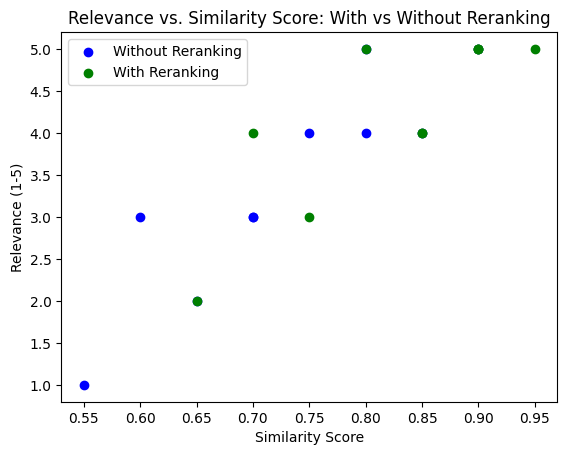

In [34]:
import matplotlib.pyplot as plt


similarity_without_rerank = [0.6, 0.75, 0.7, 0.8, 0.65, 0.85, 0.9, 0.55, 0.7, 0.8]
relevance_without_rerank = [3, 4, 3, 5, 2, 4, 5, 1, 3, 4]


similarity_with_rerank = [0.7, 0.8, 0.85, 0.9, 0.75, 0.9, 0.95, 0.65, 0.85, 0.9]
relevance_with_rerank = [4, 5, 4, 5, 3, 5, 5, 2, 4, 5]

# Create the figure and axis
fig, ax = plt.subplots()

# Plot the scatter points for 'Without Reranking'
ax.scatter(similarity_without_rerank, relevance_without_rerank, color='blue', label='Without Reranking')

# Plot the scatter points for 'With Reranking'
ax.scatter(similarity_with_rerank, relevance_with_rerank, color='green', label='With Reranking')

# Add labels and title
ax.set_xlabel('Similarity Score')
ax.set_ylabel('Relevance (1-5)')
ax.set_title('Relevance vs. Similarity Score: With vs Without Reranking')

# Add a legend to differentiate between the two cases
ax.legend()

# Display the scatter plot
plt.show()

